## Gán mẫu ngẫu nhiên

Gán là hành động thay thế dữ liệu bị khuyết bằng các ước tính thống kê về các giá trị bị khuyết. Mục tiêu của bất kỳ kỹ thuật gán nào là tạo ra một **tập dữ liệu hoàn chỉnh** có thể sử dụng để huấn luyện các mô hình học máy.

Gán mẫu ngẫu nhiên về nguyên tắc cũng tương tự như gán mean/median/mode, nó nhằm mục đích bảo toàn các tham số thống kê của biến ban đầu có dữ liệu bị khuyết.

Gán mẫu ngẫu nhiên gồm việc lấy một quan sát ngẫu nhiên từ vùng các quan sát có sẵn của biến và sử dụng giá trị được trích xuất ngẫu nhiên đó để điền NA. Trong gán mẫu ngẫu nhiên, càng có nhiều giá trị bị khuyết trong biến thì càng lấy nhiều quan sát ngẫu nhiên. 

Bằng các quan sát mẫu ngẫu nhiên của biến cho những trường hợp có sẵn dữ liệu, chúng ta đảm bảo giá trị trung bình và độ lệch chuẩn của biến được giữ nguyên.

Bằng các quan sát mẫu ngẫu nhiên của các hạng mục hiện tại, chúng ta đảm bảo rằng tần suất của các hạng mục/nhãn khác nhau trong biến được giữ nguyên với các biến hạng mục.


### Những biến nào có thể gán mẫu ngẫu nhiên?

Gán mẫu ngẫu nhiên có thể áp dụng cho cả biến dạng số và biến hạng mục.


### Giả định

Gán mẫu ngẫu nhiên giả định rằng dữ liệu bị khuyết hoàn toàn ngẫu nhiên (MCAR). Nếu đúng như vậy, chúng ta nên thay thế các giá trị bị khuyết bằng các giá trị được trích xuất từ ​​phân phối ban đầu của biến.

Từ góc nhìn xác suất, các giá trị thường xuất hiện hơn như mean, median hoặc hạng mục thường xuất hiện nhất sẽ được chọn thường xuyên hơn - vì có nhiều giá trị trong số chúng để chọn hơn cho các biến hạng mục, nhưng các giá trị ít thường xuất hiện khác cũng sẽ được chọn. Do đó, phương sai và phân phối của biến được bảo toàn.

Ý tưởng là thay thế tập hợp các giá trị bị khuyết bằng một tập hợp các giá trị có cùng phân phối của biến ban đầu.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Bảo toàn phương sai của biến.

### Hạn chế

- Tính ngẫu nhiên.
- Mối quan hệ của các biến đã gán với các biến khác có thể bị ảnh hưởng nếu có nhiều NA.
- Cần nhiều bộ nhớ để triển khai, vì chúng ta cần lưu trữ tập huấn luyện ban đầu để trích xuất các giá trị và thay thế NA trong các quan sát sắp tới.


### Khi nào thì dùng gán mẫu ngẫu nhiên?

- Dữ liệu bị khuyết hoàn toàn ngẫu nhiên.
- Không nhiều hơn 5% biến chứa dữ liệu bị khuyết.
- Rất thích hợp cho các mô hình tuyến tính vì nó không làm sai lệch phân phối, bất kể % NA là bao nhiêu.

Nếu được kết hợp với Chỉ số bị khuyết thì có thể sử dụng phương pháp này khi dữ liệu không bị khuyết ngẫu nhiên hoặc khi có nhiều quan sát bị khuyết.


#### Tính ngẫu nhiên

Tính ngẫu nhiên có vẻ không được quan tâm nhiều khi thay các giá trị bị khuyết trong các cuộc thi dữ liệu, trong đó toàn bộ các giá trị bị khuyết được thay thế một lần, sau đó tập dữ liệu được tính điểm và kết thúc vấn đề. Tuy nhiên, điều này lại khác trong bối cảnh kinh doanh.

Giả sử một nhà sản xuất ô tô đang cố gắng dự đoán xem một chiếc ô tô nhất định sẽ ở trong gara bao lâu trước khi qua tất cả các kiểm định chất lượng. Hôm nay, họ nhận được một chiếc ô tô có dữ liệu bị khuyết trong một số biến; họ chạy mô hình máy học để dự đoán chiếc ô tô này sẽ ở trong ga ra bao lâu, mô hình thay thế các giá trị bị khuyết bằng một mẫu ngẫu nhiên của biến, sau đó ước tính thời gian. Ngày mai, khi họ chạy mô hình tương tự trên cùng ô tô đó, mô hình sẽ chỉ định ngẫu nhiên các giá trị cho dữ liệu bị khuyết, có thể giống hoặc không giống với dữ liệu mà nó đã chọn hôm qua nên ước tính cuối cùng về thời gian trong gara có thể giống hoặc khác với kết quả thu được hôm trước.

Ngoài ra, giả sử nhà sản xuất ô tô đánh giá 2 ô tô khác nhau có cùng các giá trị cho tất cả các biến và các giá trị bị khuyết trong cùng một tập hợp con của các biến. Họ chạy mô hình học máy cho từng ô tô và do dữ liệu bị khuyết được điền ngẫu nhiên với các giá trị nên 2 ô tô hoàn toàn giống nhau, có thể dẫn đến các ước tính khác nhau về thời gian ô tô trong ga ra.

Điều này nghe có vẻ hoàn toàn tầm thường và không quan trọng, tuy nhiên, các doanh nghiệp phải tuân theo nhiều quy định khác nhau, một số quy định yêu cầu sự xử lý như nhau để cung cấp cho các trường hợp tương tự. Thay vì ô tô, với những người đang xin vay nợ hoặc đang tìm cách trị bệnh thì mô hình học máy sẽ cung cấp các giải pháp khác nhau cho các ứng viên có cùng điều kiện. Điều này không công bằng hoặc không thể chấp nhận, cần tránh hành vi này.

#### Vậy chúng ta có nên thay ngẫu nhiên NA không?

Vẫn có thể thay thế dữ liệu bị khuyết bằng mẫu ngẫu nhiên, nhưng tính ngẫu nhiên này cần được kiểm soát để các cá nhân trong cùng một tình huống có cùng điểm số nhằm đưa ra các giải pháp tương tự. Làm thế nào để đảm bảo điều này? Bằng cách thiết lập seed hợp lý trong quá trình ra trích xuất ngẫu nhiên các giá trị.

Cuối cùng, tương tự như việc thay thế bằng giá trị mean/median, một hạn chế tiềm ẩn khác của gán mẫu ngẫu nhiên là tính ngẫu nhiên cũng có thể loại bỏ các ước tính hiệp phương sai và mối tương quan với các biến khác trong tập dữ liệu, đặc biệt là nếu khuyết nhiều quan sát.


### Lưu ý cuối cùng

Mặc dù có khái niệm tương tự như thay thế bằng mean/median, thay thế các giá trị bị khuyết bằng mẫu ngẫu nhiên không được sử dụng rộng rãi trong cộng đồng khoa học dữ liệu như gán mean/median, có lẽ là do yếu tố ngẫu nhiên hoặc do việc triển khai code không đơn giản như vậy.


Tuy nhiên, đây là một cách tiếp cận hợp lệ, có lợi thế rõ ràng so với gán mean/median vì nó bảo toàn phân phối của biến. Phương pháp này cũng được lựa chọn nếu chúng ta quan tâm đến yếu tố ngẫu nhiên và giải thích cho nó, đặc biệt là đối với các mô hình tuyến tính.

## Trong bản mô phỏng này:

Chúng ta sẽ học cách thực hiện gán mẫu ngẫu nhiên sử dụng pandas trong tập dữ liệu titanic và giá nhà ở Ames.

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia và chuẩn hóa các tập dữ liệu
from sklearn.model_selection import train_test_split

## Mẫu ngẫu nhiên cho các biến dạng số

In [19]:
# load tập dữ liệu Titanic với một số biến để biểu diễn

data = pd.read_csv('lab6-13_dataset/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [20]:
# xem phần trăm NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Gán quan trọng

Việc gán phải được thực hiện trong tập huấn luyện, sau đó được truyền sang tập kiểm tra. Điều này có nghĩa là mẫu ngẫu nhiên được dùng để điền các giá trị bị khuyết ở cả tập huấn luyện và tập kiểm tra, được trích xuất từ tập huấn luyện.

In [43]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.survived,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((916, 3), (393, 3))

In [50]:
## Yêu cầu 1: gán Age bằng mẫu ngẫu nhiên ở cả
# tập huấn luyện và tập kiểm tra

# tạo biến mới mà NA sẽ được gán:
# tạo bản sao từ biến ban đầu với NA

## VIẾT CODE Ở ĐÂY:
X_train['Age_imputed'] = X_train['age'].copy(deep=False)
X_test['Age_imputed'] = X_test['age'].copy(deep=True)

# trích xuất mẫu ngẫu nhiên để điền na:
# luôn thực hiện điều này từ tập huấn luyện, và sử dụng
# chúng để điền cả tập huấn luyện và tập kiểm tra

random_sample_train = X_train['age'].dropna().sample(
    X_train['age'].isnull().sum(), random_state=0)

## VIẾT CODE Ở ĐÂY:
random_sample_test = X_train['age'].dropna().sample(X_test['age'].isnull().sum(), random_state=0)

# các code trên thực hiện những gì?

# 1) dropna() loại bỏ NA từ biến ban đầu, 
# tức là chúng ta sẽ trích xuất ngẫu nhiên các giá trị hiện có và không NA

# 2) sample() là phương thức thực hiện mẫu ngẫu nhiên

# 3) X_train['Age'].isnull().sum() là số lượng giá trị ngẫu nhiên để trích xuất
# chúng ta muốn trích xuất càng nhiều giá trị NA càng tốt trong biến ban đầu

# 4) random_state đặt seed cho khả năng tái lặp lại để trích xuất
# luôn cùng các giá trị ngẫu nhiên mỗi lần chạy notebook này

# pandas cần có cùng chỉ số để hợp nhất tập dữ liệu
random_sample_train.index = X_train[X_train['age'].isnull()].index
## VIẾT CODE Ở ĐÂY:
random_sample_test.index = X_test[X_test['age'].isnull()].index

# thay thế NA trong biến mới tạo
X_train.loc[X_train['age'].isnull(), 'Age_imputed'] = random_sample_train
## VIẾT CODE Ở ĐÂY:
X_test.loc[X_test['age'].isnull(), 'Age_imputed'] = random_sample_train

<details><summary> Gợi ý </summary>

[copy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html)

[sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

</details>

In [51]:
# kiểm tra xem NA đã được gán chưa
X_train['Age_imputed'].isnull().sum()

0

In [52]:
# kiểm tra xem NA đã được gán chưa
X_test['Age_imputed'].isnull().sum()

88

In [34]:
X_train.head(15)

,survived,age,fare,Age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


Chúng ta thấy NA được thay thế bằng các giá trị trong các hàng khác nhau thế nào! Đây là điều chúng ta muốn.

#### Mẫu ngẫu nhiên bảo toàn phân phối ban đầu của biến

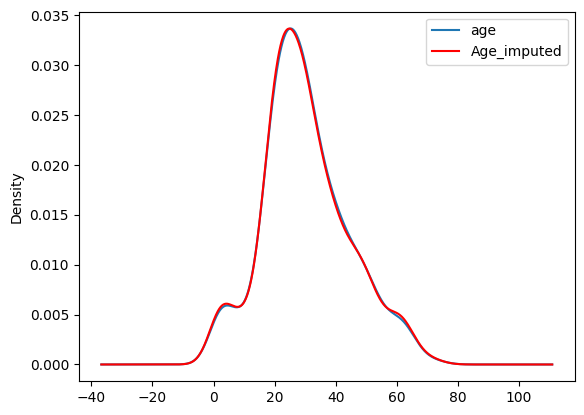

In [35]:
# chúng ta thấy phân phối của biến sau khi
# gán mẫu ngẫu nhiên gần như ý hệt so với ban đầu

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['age'].plot(kind='kde', ax=ax)
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Chúng ta có thể thấy rằng việc thay thế các giá trị bị khuyết bằng một mẫu ngẫu nhiên từ tập huấn luyện sẽ bảo toàn phân phối ban đầu của biến. Từ các notebook trước, mọi kỹ thuật gán khác đều thay đổi phân phối của Age, vì % NA trong Age cao, ~ 20%. Tuy nhiên, ngay cả trong những trường hợp đó, gán mẫu ngẫu nhiên cũng đều bảo toàn phân phối. Vì vậy, kỹ thuật gán này khá tiện dụng nếu xây dựng các mô hình tuyến tính và không muốn làm sai lệch các phân phối chuẩn.

In [36]:
# phương sai của biến có thay đổi một chút.
# tuy nhiên, thay đổi này rất nhỏ khi so sánh với gán mean/median
# (xem notebook trước để so sánh)

print('Original variable variance: ', X_train['age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581863
Variance after random imputation:  198.53703762759557


In [37]:
#hiệp phương sai của Age với Fare cũng ít bị ảnh hưởng bởi
# kỹ thuật gán này so với gán mean/median

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
Age_imputed,100.938070,194.163047,198.537038


<Axes: >

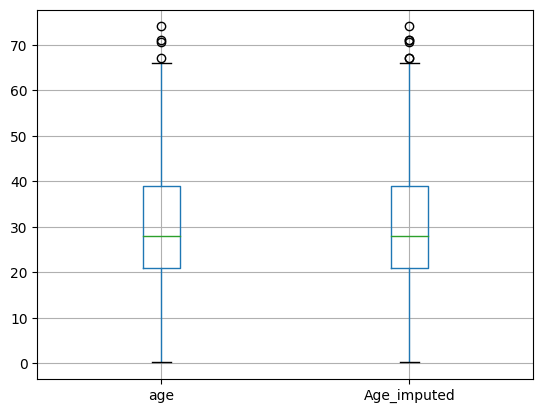

In [38]:
# Cuối cùng, outlier cũng ít bị ảnh hưởng bới kỹ thuật gán này

# Hãy tìm hiểu qua biểu đồ hộp
X_train[['age', 'Age_imputed']].boxplot()

Vậy, gán mẫu ngẫu nhiên có ưu điểm là bảo toàn phân phối ban đầu. Đó là một điểm cộng lớn, đặc biệt nếu chúng ta quan tâm đến các phân phối và outlier cho các mô hình học máy; nó vô cùng thích hợp với các mô hình tuyến tính nhưng lại không quá quan trọng đối với các thuật toán cây.

## Tính ngẫu nhiên có thể dẫn đến gán các điểm số khác nhau cho cùng một quan sát

Hãy xem xét tác động của tính ngẫu nhiên đối với nhiều điểm và cách  giảm thiểu hành vi này, vì điều này rất quan trọng khi đưa mô hình vào sản xuất/tích hợp mô hình với hệ thống trực tiếp. 

In [39]:
# chọn một quan sát có NA trong Age
# trong trường hợp này chọn quan sát được lập chỉ mục 5

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [40]:
# giờ hãy điền NA đó với một giá trị ngẫu nhiên
# được trích xuất từ biến tương tự có sẵn các quan sát

# trích xuất một giá trị ngẫu nhiên, chỉ 1
sampled_value = X_train['age'].dropna().sample(1)

# lập lại chỉ mục thành 5
sampled_value.index = [15]  # pandas cần index tương tự để hợp nhất

# thay thế NA với giá trị mẫu
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,18.0


In [41]:
# lặp lại bài tập này một lần nữa:
# điền NA với một giá trị ngẫu nhiên khác được trích xuất 

# trích xuất một giá trị ngẫu nhiên, chỉ 1
sampled_value = X_train['age'].dropna().sample(1)

# lập lại chỉ mục thành 5
sampled_value.index = [15]  #pandas cần index tương tự để hợp nhất

# thay thế NA với giá trị mẫu
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,32.5


In [ ]:
# lặp lại lần nữa:
# điền NA với một giá trị ngẫu nhiên khác được trích xuất 

# trích xuất một giá trị ngẫu nhiên, chỉ 1
sampled_value = X_train['age'].dropna().sample(1)

# lập lại chỉ mục thành 5
sampled_value.index = [15]  #pandas cần index tương tự để hợp nhất

# thay thế NA với giá trị mẫu
observation['Age_random'] = sampled_value

observation

,survived,age,fare,Age_random
15,0,NaN,25.925,33.0


Chúng ta có thể thấy mỗi lần lặp lại thao tác sẽ nhận được một giá trị thay thế khác cho cùng một quan sát. Trên thực tế, nếu chúng ta lặp lại quá trình 1000 lần:

Text(0, 0.5, 'Number of times')

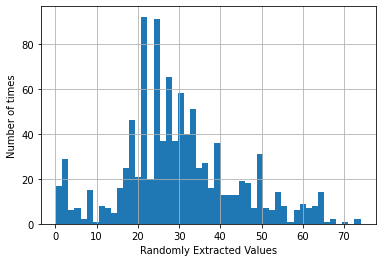

In [ ]:
## Yêu cầu 2: nếu lặp lại quá trình 1000 lần:

values_ls = []

# nắm các giá trị không phải Na để tăng tốc
# tính toán
tmp = X_train.age.dropna()

## VIẾT CODE Ở ĐÂY:
for i in range(...):
    
    # trích xuất một giá trị ngẫu nhiên, chỉ 1
    sampled_value = tmp.sample(1).values
    
    # thêm giá trị đã trích xuất vào list
    ## VIẾT CODE Ở ĐÂY:
    values_ls.append(float(...))

## VIẾT CODE Ở ĐÂY:
pd.Series(values_ls)....(bins=50)
plt.xlabel('Randomly Extracted Values')
plt.ylabel('Number of times')

Chúng ta thu được các giá trị khác nhau cho cùng một quan sát. Lưu ý cách phân phối của các giá trị được trích xuất tương tự như phân phối của Age.

Trong trường hợp các bệnh nhân đang tìm cách trị bệnh, mỗi khi chúng ta chạy một mô hình dự đoán, mô hình này sẽ hoạt động trên các giá trị được trích xuất ngẫu nhiên khác nhau, chúng ta sẽ chỉ định những bệnh nhân có cùng đặc điểm cho các phương pháp điều trị khác nhau; điều này không ổn.

### Làm thế nào để sửa cách xử lý này ?

Có thể sửa bằng cách chỉ định một seed:

In [ ]:
## Yêu cầu 3
values_ls = []

for i in range(100):

    # trích xuất một giá trị ngẫu nhiên, chỉ 1 với seed
    ## VIẾT CODE Ở ĐÂY:
    sampled_value = X_train.age.dropna().sample(..., random_state=10)

    # thêm giá trị đã trích xuất vào list
    ## VIẾT CODE Ở ĐÂY:
    values_ls.append(float(...))

# in ra các giá trị
## VIẾT CODE Ở ĐÂY:
pd.Series(...).unique()

array([23.5])

In [ ]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

Bây giờ chúng ta thiết lập seed, mọi giá trị trích xuất ngẫu nhiên cho quan sát đó đều giống nhau.

Tuy nhiên, nếu chúng ta đặt cùng một seed cho mỗi một quan sát đơn lẻ thì chúng sẽ điền NA với cùng giá trị (cùng seed == cùng giá trị ngẫu nhiên được trích xuất). Điều này tương đương với gán giá trị bất kỳ!!!

Nhưng chúng ta cũng không muốn cách xử lý  đó.

Do đó, chúng ta muốn seed thay đổi từng quan sát nhưng theo cách có thể kiểm soát sao cho 2 quan sát hoàn toàn giống nhau nhận cùng các giá trị ngẫu nhiên đã gán. Tuy nhiên, 2 quan sát khác nhau lại nhận các giá trị ngẫu nhiên đã gán khác nhau. 

### Kiểm soát yếu tố ngẫu nhiên bằng cách thay đổi seed

Chúng ta có thể gán một seed khác cho mỗi quan sát và trên thực tế, chúng ta có thể làm cho seed này phụ thuộc vào biến thay thế của cùng một quan sát, do đó, trong tập dữ liệu Titanic, nếu 2 hành khách trả giá vé như nhau thì họ sẽ có cùng xác suất sống sót (khi Age bị khuyết). 

In [ ]:
# let's pick one observation with NA in Age chọn một quan sát với NA trong Age
# trong trường hợp này chúng ta chọn quan sát được đánh chỉ mục 5

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [ ]:
# seed bây giờ là Fare

int(observation.fare)

25

In [ ]:
## Yêu cầu 4: chỉ định Fare làm seed trong trích xuất mẫu ngẫu nhiên
## VIẾT CODE Ở ĐÂY:
sampled_value = X_train.age....sample(..., random_state=int(observation.fare))
sampled_value.index = [15]

## VIẾT CODE Ở ĐÂY:
observation['Age_random'] = ...
observation

,survived,age,fare,Age_random
15,0,NaN,25.925,44.0


In [ ]:
# cho một quan sát khác với Fare khác,
# chúng ta sẽ nhận được một giá trị được trích xuất ngẫu nhiên khác

observation = data[data.age.isnull()].tail(1)
observation

,survived,age,fare
1305,0,NaN,14.4542


In [ ]:
# seed mới
int(observation.fare)

14

In [ ]:
# chỉ định Fare làm seed trong trích xuất mẫu ngẫu nhiên
sampled_value = X_train.age.dropna().sample(1,
                                            random_state=int(observation.fare))
sampled_value.index = [1305]

observation['Age_random'] = sampled_value
observation

,survived,age,fare,Age_random
1305,0,NaN,14.4542,40.0


Đây là một cách để kiểm soát tính ngẫu nhiên. Sử dụng Fare để thiết lập random state nhằm đảm bảo 2 hành khách có Fare như nhau, Age sẽ được thay thế bằng cùng một số và do đó 2 hành khách sẽ có cùng xác suất sống sót.

### Lưu ý!!

Trên thực tế, chúng ta sẽ xây dựng các mô hình sử dụng hàng chục biến trở lên. Trong những trường hợp như vậy, chúng ta có thể nghĩ đến việc chọn 3-5 biến quan trọng hơn, những biến có tác động mạnh nhất đến đầu ra của mô hình học máy và kết hợp chúng để tạo random state. Do đó, những khách hàng có chung 3-5 giá trị biến chính sẽ được hệ số như nhau. 

## Mẫu ngẫu nhiên cho biến hạng mục

In [ ]:
# load tập dữ liệu với một số cột để trình bày
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)

# kiểm tra phần trăm các giá trị bị khuyết ở từng biến
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [ ]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
## Yêu cầu 5: gán BsmtQual bằng mẫu ngẫu nhiên ở cả
# tập huấn luyện và tập kiểm tra

# tạo biến mới có NA được gán
# tạo bản sao từ biến ban đầu
## VIẾT CODE Ở ĐÂY:
X_train['BsmtQual_imputed'] = ...
X_test['BsmtQual_imputed'] = ...

# trích xuất mẫu ngẫu nhiên để điền na:
# chúng ta luôn làm điều này từ tập huấn luyện và sử dụng chúng
# để điền cả tập huấn luyện và tập kiểm tra

## VIẾT CODE Ở ĐÂY:
random_sample_train = ....sample(..., random_state=0)

random_sample_test = ...

# các code trên thực hiện những gì?
# 1) dropna() loại bỏ NA khỏi biến biến ban đầu, điều này
# nghĩa là chúng ta sẽ trích xuất xuất ngẫu nhiên các giá trị hiện có và không NA

# 2) sample() là phương thức để thực hiện lấy mẫu ngẫu nhiên

# 3) X_train['BsmtQual'].isnull().sum() là số lượng giá trị ngẫu nhiên để trích xuất
# chúng ta trích xuất càng nhiều giá trị khi có NA trong biến bau đầu

# 4) random_state thiết lập seed cho khả năng tái lặp để có thể trích xuất 
# các giá trị ngẫu nhiên tương tự mỗi lần chạy notebook

# pandas cần có cùng index để hợp nhất tập dữ liệu
## VIẾT CODE Ở ĐÂY:
random_sample_train.index = ...
random_sample_test.index = ...

# thay thế NA trong biến vừa mới tạo
## VIẾT CODE Ở ĐÂY:
X_train.loc[X_train['BsmtQual'].isnull(), 'BsmtQual_imputed'] = ...
X_test.loc[X_test['BsmtQual'].isnull(), 'BsmtQual_imputed'] = ...

In [ ]:
## Yêu cầu 6: gán FireplaceQu bằng mẫu ngẫu nhiên ở cả
# tập huấn luyện và tập kiểm tra

# tạo biến mới có NA được gán
# tạo bản sao từ biến ban đầu với NA
## VIẾT CODE Ở ĐÂY:
X_train['FireplaceQu_imputed'] = ...
X_test['FireplaceQu_imputed'] = ...

# trích xuất mẫu ngẫu nhiên để điền na:
# chúng ta luôn làm điều này từ tập huấn luyện và sử dụng chúng
# để điền cả tập huấn luyện và tập kiểm tra

## VIẾT CODE Ở ĐÂY:
random_sample_train = ...(..., random_state=0)

random_sample_test = ...(...random_state=0)

# các code trên thực hiện những gì?
# 1) dropna() loại bỏ NA khỏi biến biến ban đầu, điều này
# nghĩa là chúng ta sẽ trích xuất xuất ngẫu nhiên các giá trị hiện có và không NA

# 2) sample() là phương thức để thực hiện lấy mẫu ngẫu nhiên

# 3) X_train['FireplaceQu'].isnull().sum() là số lượng giá trị ngẫu nhiên để trích xuất
# chúng ta trích xuất càng nhiều giá trị khi có NA trong biến bau đầu

# 4) random_state thiết lập seed cho khả năng tái lặp để có thể trích xuất 
# các giá trị ngẫu nhiên tương tự mỗi lần chạy notebook

# pandas cần có cùng index để hợp nhất tập dữ liệu
## VIẾT CODE Ở ĐÂY:
random_sample_train.index = ...
random_sample_test.index = ...

# thay thế NA trong biến vừa mới tạo
## VIẾT CODE Ở ĐÂY:
X_train.loc[X_train['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = ...
X_test.loc[X_test['FireplaceQu'].isnull(), 'FireplaceQu_imputed'] = ...

In [ ]:
# kiểm tra các null vừa bị loại vỏ
X_train['FireplaceQu_imputed'].isnull().sum()

0

In [ ]:
## Yêu cầu 7: đánh giá tác động của gán với phân phối
# của các hạng mục và mục tiêu trong các hạng mục đó

# sử dụng một hàm tương tự trong notebook về gán giá trị bất kỳ
# cho các biến hạng mục

def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # % quan sát trên mỗi hạng mục, biến ban đầu
            ## VIẾT CODE Ở ĐÂY:
            df[...].value_counts() / len(df[variable_original].dropna()),

            # % quan sát trên mỗi hạng mục, biến đã gán
            ## VIẾT CODE Ở ĐÂY:
            df[...].value_counts() / len(df)
        ],
        axis=1)

    # them tên cột
    tmp.columns = ['original', 'imputed']

    return tmp

In [ ]:
# chạy hàm trong biến hạng mục
categorical_distribution(X_train, 'BsmtQual', 'BsmtQual_imputed')

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [ ]:
# chạy hàm trong biến hạng mục
categorical_distribution(X_train, 'FireplaceQu', 'FireplaceQu_imputed')

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


Như dự đoán, tỷ lệ phần trăm quan sát trong mỗi hạng mục ở biến ban đầu và biến đã gán rất giống nhau cho cả BsmtQual có NA thấp và FireplaceQu có NA cao.

In [ ]:
# xem phân phối của mục tiêu trong từng
# hạng mục biến

def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].dropna().unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # thêm legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()

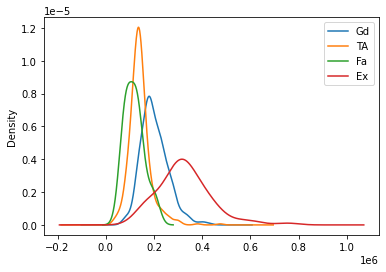

In [ ]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')

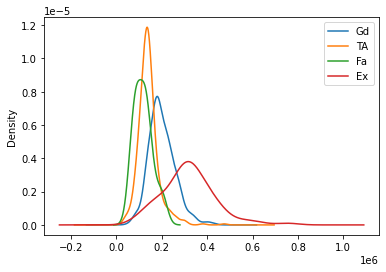

In [ ]:
automate_plot(X_train, 'BsmtQual_imputed', 'SalePrice')

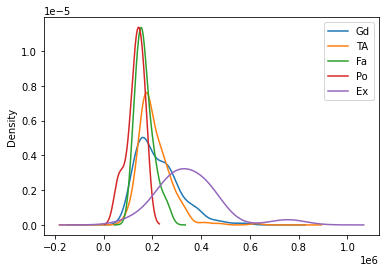

In [ ]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

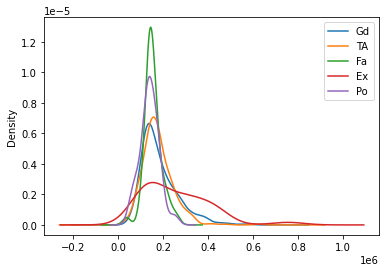

In [ ]:
automate_plot(X_train, 'FireplaceQu_imputed', 'SalePrice')

Với BsmtQual có NA thấp, phân phối mục tiêu được giữ nguyên cho các hạng mục trong biến ban đầu và biến đã gán. Còn với FireplaceQu có nhiều NA hơn thì phân phối mục tiêu cho mỗi hạng mục bị ảnh hưởng một chút.

## Lưu ý về code gán mẫu ngẫu nhiên

Code để lấy mẫu ngẫu nhiên trong notebook này có hơi phức tạp nhưng đừng lo lắng, chúng ta có thể thực hiện gán mẫu ngẫu nhiên chỉ với một vài dòng bằng gói Feature Engine, sẽ đề cập chi tiết hơn trong notebok sắp tới.
